# Twitter analysis

## Import Library

In [2]:
# import library yang dibutuhkan
import pandas as pd # untuk mengelola data dalam bentuk tabel
import numpy as np # untuk melakukan proses komputasi numerik
import json # untuk membaca data file dengan format json
import matplotlib.pyplot as plt # untuk membuat visualisasi data
from pandas_profiling import ProfileReport # untuk membuat EDA dengan baris kode yang ringkas dan sekali running
import seaborn as sns # untuk membuat visualisasi data (lebih ringkas daripada matplotlib)
from sklearn import datasets # untuk processing atau traning data
from sklearn.model_selection import train_test_split # untuk membagi data menjadi data training dan data testing
from sklearn.linear_model import LinearRegression # untuk membuat regresi linear
from sklearn.cluster import DBSCAN # untuk kebutuhan klasifikasi dan pengelompokan data
from sklearn.preprocessing import RobustScaler # untuk melakukan normalisasi data agar data yang digunakan tidak memiliki ...
# ... penyimpangan yang besar dengan menggunakan nilai median dan quartiles agar data-data pencilan bisa diabaikan
from sklearn.metrics import silhouette_score
import spacy # untuk natural language processing
from IPython.display import Markdown as md
from spacytextblob.spacytextblob import SpacyTextBlob # text blob untuk mendeteksi makna/konotasi dari kata-kata yang diinput
from tqdm import tqdm # untuk menampilkan animasi loading progress dalam bentuk bar
import openpyxl # untuk membaca file excel 2010

## Data analysis

In [3]:
# membuka file json menggunakan library json
f = open('tweets.json', encoding="utf8")
data = json.load(f)
data

[{'id': 1540547561601511424,
  'text': 'RT @Coredao_Org: Bitcoin will play a very important role in the societal structure of this digital city. People know that Bitcoin is not on…',
  'created_at': 'Sat Jun 25 04:08:55 +0000 2022',
  'user': '진우태',
  'username': 'jinwootae2412',
  'user_id': 1388363038697295876,
  'user_location': '',
  'user_followers': 15,
  'user_following': 183,
  'user_verified': False,
  'user_tweets_count': 401,
  'user_created_at': 'Sat May 01 05:22:28 +0000 2021'},
 {'id': 1540547560351453184,
  'text': 'RT @BigSeanHarris: The correct method to smash buy #bitcoin when it dips 😂   https://t.co/AJxE4jiEUF',
  'created_at': 'Sat Jun 25 04:08:55 +0000 2022',
  'user': 'Sandy Davis',
  'username': 'DmanCrypto86',
  'user_id': 1377985407376367619,
  'user_location': 'Fayetteville, NC',
  'user_followers': 6,
  'user_following': 34,
  'user_verified': False,
  'user_tweets_count': 12,
  'user_created_at': 'Fri Apr 02 14:05:36 +0000 2021'},
 {'id': 154054755582176051

In [4]:
# normalisasi data dari json ke dataframe
data_normalize = pd.json_normalize(data)
data_normalize

,id,text,created_at,user,username,user_id,user_location,user_followers,user_following,user_verified,user_tweets_count,user_created_at
0,1540547561601511424,RT @Coredao_Org: Bitcoin will play a very impo...,Sat Jun 25 04:08:55 +0000 2022,진우태,jinwootae2412,1388363038697295876,,15,183,False,401,Sat May 01 05:22:28 +0000 2021
1,1540547560351453184,RT @BigSeanHarris: The correct method to smash...,Sat Jun 25 04:08:55 +0000 2022,Sandy Davis,DmanCrypto86,1377985407376367619,"Fayetteville, NC",6,34,False,12,Fri Apr 02 14:05:36 +0000 2021
2,1540547555821760512,@RicherDadBlog Mr Bitcoin,Sat Jun 25 04:08:53 +0000 2022,tweety Bird,tweetyB98517943,979321056560168960,,11,130,False,4763,Thu Mar 29 11:35:09 +0000 2018
3,1540547554013696000,RT @turaxtoken: Take part info our #Airdrop ...,Sat Jun 25 04:08:53 +0000 2022,EM 🌱🚀,kxjen016,1343064293198065664,Manifesting;,117,4332,False,71662,Sun Dec 27 05:21:04 +0000 2020
4,1540547553011302400,RT @simplykashif: Many believe that Bitcoin is...,Sat Jun 25 04:08:53 +0000 2022,Asharib Ali,Asharib_4,1483781769727987713,,1840,194,False,8479,Wed Jan 19 12:42:08 +0000 2022
...,...,...,...,...,...,...,...,...,...,...,...,...
241,1540567624995999744,"RT @SlingShotOn: When #Bitcoin reaches $40,000...",Sat Jun 25 05:28:38 +0000 2022,chaa 🐣 • kinda ia,bbyysugarrr,1386294280688332805,(she/her) • #아스트로,3698,2322,False,113450,Sun Apr 25 12:21:36 +0000 2021
242,1540567622777028609,"RT @HukAleksandra: It’s the year 2030, Bitcoin...",Sat Jun 25 05:28:38 +0000 2022,FalaksherBaloch,BinanceWorld2,1451967336819351554,,21,103,False,1232,Sat Oct 23 17:43:01 +0000 2021
243,1540567622319734786,"53,422 #BitcoinCash #BCH (5,983,225 USD) trans...",Sat Jun 25 05:28:38 +0000 2022,WhaleAlertBCH,WhaleAlertBch,1279071043118915584,,9351,26,False,14772,Fri Jul 03 15:15:08 +0000 2020
244,1540567622131105797,@WhaleInfos @RealFlokiInu @BabyDogeCoin @bitge...,Sat Jun 25 05:28:38 +0000 2022,Mahdirazavi,Mahdirazavi2012,490312191,usa,58,52,False,20473,Sun Feb 12 12:42:09 +0000 2012


In [5]:
df = data_normalize

In [6]:
#convert data menjadi csv
df.to_csv('id user.csv') 

In [7]:
# handling missing values dengan menghapus kolom-kolom yang tidak digunakan
df.drop(columns=['id','text','created_at','user','username','user_id','user_location','user_verified','user_created_at'], inplace=True, axis=1)
df

,user_followers,user_following,user_tweets_count
0,15,183,401
1,6,34,12
2,11,130,4763
3,117,4332,71662
4,1840,194,8479
...,...,...,...
241,3698,2322,113450
242,21,103,1232
243,9351,26,14772
244,58,52,20473


In [8]:
# menampilkan hasil EDA menggunakan pandas-profiling supaya lebih ringkas
profile = ProfileReport(df, title='Sentiment Analysis')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Preprocessing Data

In [12]:
# deklarasi variable
df_scaled = df.copy()
col_names =df_scaled.columns
features = df_scaled[col_names]

In [13]:
scaler = RobustScaler()

# mentransformasikan ke dalam bentuk yang lebih mudah dibaca oleh algoritma
df_RobustScaler = df.copy()
df_RobustScaler[col_names] = scaler.fit_transform(features.values)
df_RobustScaler.describe()

,user_followers,user_following,user_tweets_count
count,246.000000,246.000000,246.000000
mean,11.803430,0.565157,1.805707
std,84.159978,1.459390,9.564666
min,-0.318159,-0.344272,-0.272454
25%,-0.212106,-0.241647,-0.212796
50%,0.000000,0.000000,0.000000
75%,0.787894,0.758353,0.787204
max,821.864932,12.486277,142.893766


In [14]:
# mengimplementasikan algoritma DBSCAN untuk mendeteksi anomali pada akun twitter 
# dengan jumlah follower dan jumlah tweet pada akun
data = df_RobustScaler[["user_followers", "user_tweets_count"]]
model = DBSCAN(eps = 0.4, min_samples = 10).fit(data)

In [15]:
# mengelompokan data dengan mengabaikan data pencilan
def dbscan(df):
    cluster_dbscan = DBSCAN(eps=8, min_samples=4).fit(df)
    n=cluster_dbscan.labels_
    return  cluster_dbscan.labels_

n=dbscan(df_RobustScaler)
n.shape
unique, counts = np.unique(n, return_counts=True)
dict(zip(unique, counts))
print('Silhoutte score of dbscan is ' , silhouette_score(df_RobustScaler,n))
# menghasilkan silhouette score
# jika mendekati 1 berarti pengelompokan data sudah baik
# jika mendekati -1 berarti pengelompokan data kurang baik

Silhoutte score of dbscan is  0.7842058446387964


In [16]:
# data yang seharusnya tidak ada
outliers = data[model.labels_ == -1]
# print(outliers.head(10))
print(outliers)

     user_followers  user_tweets_count
3         -0.084042           7.571343
4          3.363682           0.655137
8          3.273637          14.517760
13         1.588794          -0.071151
14         3.363682           0.655137
..              ...                ...
239       18.393197           1.343988
240        1.004502          -0.214329
241        7.081541          12.145586
243       18.393197           1.343988
244       -0.202101           1.968037

[79 rows x 2 columns]


In [17]:
# menampilkan 5 data teratas dari dataset tweets.csv
tweets_df = pd.read_csv("tweets.csv")
tweets_df.head()

,Unnamed: 0,id,text,created_at,user,username,user_id,user_location,user_followers,user_following,user_verified,user_tweets_count,user_created_at
0,0,1540547561601511424,RT @Coredao_Org: Bitcoin will play a very impo...,Sat Jun 25 04:08:55 +0000 2022,진우태,jinwootae2412,1388363038697295876,NaN,15,183,False,401,Sat May 01 05:22:28 +0000 2021
1,1,1540547560351453184,RT @BigSeanHarris: The correct method to smash...,Sat Jun 25 04:08:55 +0000 2022,Sandy Davis,DmanCrypto86,1377985407376367619,"Fayetteville, NC",6,34,False,12,Fri Apr 02 14:05:36 +0000 2021
2,2,1540547555821760512,@RicherDadBlog Mr Bitcoin,Sat Jun 25 04:08:53 +0000 2022,tweety Bird,tweetyB98517943,979321056560168960,NaN,11,130,False,4763,Thu Mar 29 11:35:09 +0000 2018
3,3,1540547554013696000,RT @turaxtoken: Take part info our #Airdrop ...,Sat Jun 25 04:08:53 +0000 2022,EM 🌱🚀,kxjen016,1343064293198065664,Manifesting;,117,4332,False,71662,Sun Dec 27 05:21:04 +0000 2020
4,4,1540547553011302400,RT @simplykashif: Many believe that Bitcoin is...,Sat Jun 25 04:08:53 +0000 2022,Asharib Ali,Asharib_4,1483781769727987713,NaN,1840,194,False,8479,Wed Jan 19 12:42:08 +0000 2022


In [18]:
# menampilkan nama-nama kolom
tweets_df.columns

Index(['Unnamed: 0', 'id', 'text', 'created_at', 'user', 'username', 'user_id',
       'user_location', 'user_followers', 'user_following', 'user_verified',
       'user_tweets_count', 'user_created_at'],
      dtype='object')

In [19]:
# menampilkan data di kolom text
tweets_df['text']

0      RT @Coredao_Org: Bitcoin will play a very impo...
1      RT @BigSeanHarris: The correct method to smash...
2                              @RicherDadBlog Mr Bitcoin
3      RT @turaxtoken: Take part info  our #Airdrop  ...
4      RT @simplykashif: Many believe that Bitcoin is...
                             ...                        
241    RT @SlingShotOn: When #Bitcoin reaches $40,000...
242    RT @HukAleksandra: It’s the year 2030, Bitcoin...
243    53,422 #BitcoinCash #BCH (5,983,225 USD) trans...
244    @WhaleInfos @RealFlokiInu @BabyDogeCoin @bitge...
245    Saddle․Finance Creates New Standards for DeFi ...
Name: text, Length: 246, dtype: object

In [21]:
nlp = spacy.load('en_core_web_sm') # laod fungsi nlp
_ = nlp.add_pipe('spacytextblob') # menggunakan spacy text blob

In [22]:
tweets = tweets_df['text'] # mengambil data di kolom text
tweets = tweets.to_list() # digunakan untuk mengubah tampilan list biasa menjadi list dalam array

In [23]:
# membuat variabel header untuk mengelompokan sentiment
headers = ["Negative", "Neutral", "Positive"]

In [24]:
headers

['Negative', 'Neutral', 'Positive']

In [25]:
sentiment=[] # variabel array untuk menampung data sentiment
score=[] # variabel array untuk menampung data score
for i in tqdm(range(0,len(tweets))):
    score.append(nlp(tweets[i])._.polarity) #The threshold was selected based on the distribution of the values. The distribuition can be seen below
    if score[i] >= 0.1:
        sentiment.append(headers[2]) # sentiment akan dimasukkan ke dalam kolom positive
    elif score[i] < 0:
        sentiment.append(headers[0]) # sentiment akan dimasukkan ke dalam kolom negative
    else:
        sentiment.append(headers[1]) # sentiment akan dimasukkan ke dalam kolom neutral

100%|████████████████████████████████████████████████████████████████████████████████| 246/246 [00:06<00:00, 37.84it/s]


## Menampilkan hasil processing data

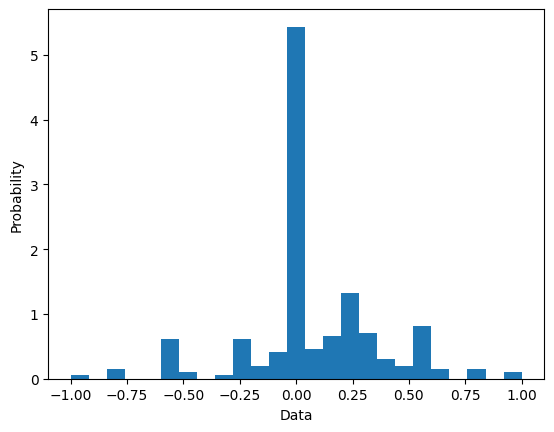

In [33]:
# menampilkan hasil dari pengelompokkan sentiment sebelumnya
q25, q75 = np.percentile(score, [25, 75])
bin_width = 2 * (q75 - q25) * len(score) ** (-1/3)
bins = round((np.max(score) - np.min(score)) / bin_width)
plt.hist(score, density=True, bins=bins)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data');
# nilai paling banyak berada di angka 0.0 yang berarti neutral

In [28]:
# menampilkan jumlah data sentiment di setiap kelompok sentiment
np.unique(sentiment, return_counts=True)

(array(['Negative', 'Neutral', 'Positive'], dtype='<U8'),
 array([ 49, 110,  87], dtype=int64))

In [29]:
# membungkus data tweets, score, dan sentiment ke dalam sebuah dataframe yang dimasukkan ke dalam variabel data_tweets
data_tweets = pd.DataFrame(list(zip(tweets, score, sentiment)), columns = ['tweets','polarity', 'sentiment'])

In [30]:
# menampilkan jumlah tweets
len(tweets)

246

In [31]:
# menampilkan jumlah sentiment
len(sentiment)

246

In [32]:
# menampilkan nilai/isi dari variabel data_tweets
data_tweets

,tweets,polarity,sentiment
0,RT @Coredao_Org: Bitcoin will play a very impo...,0.260000,Positive
1,RT @BigSeanHarris: The correct method to smash...,0.000000,Neutral
2,@RicherDadBlog Mr Bitcoin,0.000000,Neutral
3,RT @turaxtoken: Take part info our #Airdrop ...,0.000000,Neutral
4,RT @simplykashif: Many believe that Bitcoin is...,0.214286,Positive
...,...,...,...
241,"RT @SlingShotOn: When #Bitcoin reaches $40,000...",0.317857,Positive
242,"RT @HukAleksandra: It’s the year 2030, Bitcoin...",-0.200000,Negative
243,"53,422 #BitcoinCash #BCH (5,983,225 USD) trans...",0.000000,Neutral
244,@WhaleInfos @RealFlokiInu @BabyDogeCoin @bitge...,0.168182,Positive


[Text(0, 0, '110'), Text(0, 0, '87'), Text(0, 0, '49')]

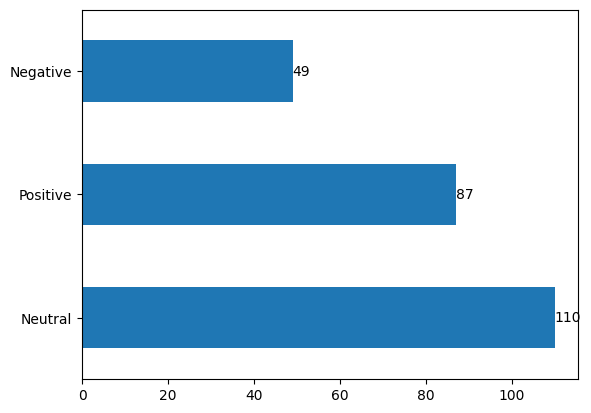

In [33]:
# menampilkan jumlah masing-masing sentiment dalam bentuk diagram batang
ax = data_tweets.sentiment.value_counts().plot.barh()

ax.bar_label(ax.containers[0])

In [34]:
# menampilkan tweets dengan sentiment negative
negative = data_tweets[data_tweets.sentiment=='Negative'].reset_index(drop=True)
negative

,tweets,polarity,sentiment
0,@zekekyle76 @Daniell71251047 @cameron You can’...,-0.050000,Negative
1,RT @CryptoWhale: BREAKING: Iran announces they...,-0.220000,Negative
2,@jordanfried But Bitcoin is down 32% since las...,-0.018519,Negative
3,@HansMlman Hello my friend Help put a smile o...,-0.050000,Negative
4,Sometimes I just want to buy a farm on like 20...,-0.800000,Negative
5,#Bitcoin mempool fees summary in the 60 second...,-0.312500,Negative
6,#Bitcoin mempool Tx summary in the last 60 sec...,-0.156250,Negative
7,@AltGemHunter @PeakyInu PeakyInu TO the fuck...,-0.600000,Negative
8,"RT @HukAleksandra: It’s the year 2030, Bitcoin...",-0.200000,Negative
9,RT @BTC_Archive: 💥BINANCE CEO: The number one ...,-0.071429,Negative


In [35]:
# menampilkan tweets dengan sentiment positive
positive = data_tweets[data_tweets.sentiment=='Positive'].reset_index(drop=True)
positive

,tweets,polarity,sentiment
0,RT @Coredao_Org: Bitcoin will play a very impo...,0.260000,Positive
1,RT @simplykashif: Many believe that Bitcoin is...,0.214286,Positive
2,RT @avalancheavax: Good Bridging 🔺 Now that t...,0.350000,Positive
3,RT @SocialGood_Inc: 🏖️ Win $100 in $BTC 🏖️ Fol...,0.550417,Positive
4,RT @BTC_Archive: 💥UK: #Bitcoin and crypto coul...,0.250000,Positive
...,...,...,...
82,RT @Nneuman: Get ready for years of bankruptcy...,0.200000,Positive
83,@Dennis_Porter_ #Bitcoin will win either way,0.800000,Positive
84,"RT @SlingShotOn: When #Bitcoin reaches $40,000...",0.317857,Positive
85,@WhaleInfos @RealFlokiInu @BabyDogeCoin @bitge...,0.168182,Positive


In [36]:
# menampilkan tweets dengan sentiment neutral
neutral = data_tweets[data_tweets.sentiment=='Neutral'].reset_index(drop=True)
neutral

,tweets,polarity,sentiment
0,RT @BigSeanHarris: The correct method to smash...,0.000,Neutral
1,@RicherDadBlog Mr Bitcoin,0.000,Neutral
2,RT @turaxtoken: Take part info our #Airdrop ...,0.000,Neutral
3,RT @sunnydecree: The #Bitcoin network is the w...,0.000,Neutral
4,@CryptoWhale If you listened ten years ago and...,0.000,Neutral
...,...,...,...
105,RT @YoloOptions: @TomerStrolight Out of these ...,0.000,Neutral
106,RT @BitcoinMagazine: Forbes: #Bitcoin can help...,0.000,Neutral
107,Before claiming crypto is a fad do 30 hours of...,0.075,Neutral
108,"59,088 #BitcoinCash #BCH (6,617,817 USD) trans...",0.000,Neutral


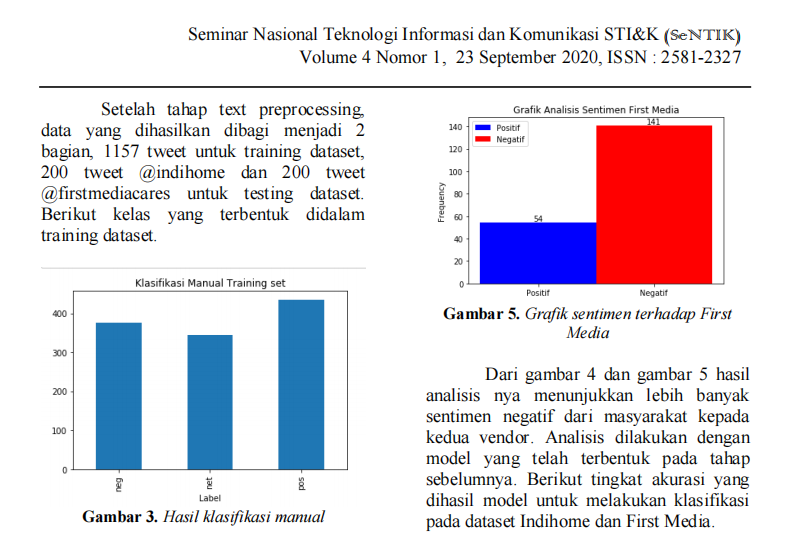

In [7]:
from IPython.display import Image
Image(filename='1.png')

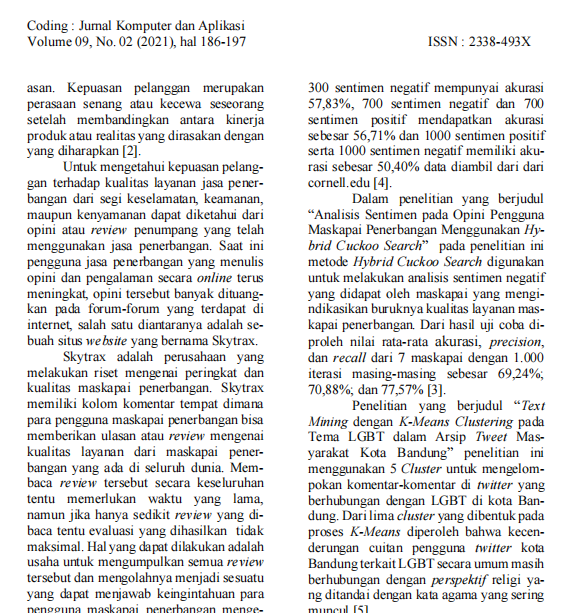

In [8]:
Image(filename='2.png') 